In [1]:
import seaborn as sns; sns.set(font="IPAexGothic")
import matplotlib.pyplot as plt
%matplotlib inline
import japanize_matplotlib
print(sns.__version__)

import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
%matplotlib inline

np.random.seed(1000)

0.9.0


$$ {}_LC_l 
\left( \frac{1}{1+exp(-(\beta_{0} + \beta_{1}*x + \beta_{2}*f))} \right)^l
\left( 1- \frac{1}{1+exp(-(\beta_{0} + \beta_{1}*x + \beta_{2}*f))} \right)^(L-l)$$

In [2]:
from scipy.special import comb
import math

def func(L,l,beta1,beta2,beta3,x,f):
    theta = beta1 + beta2 * x + beta3 * f
    
    combination = comb(L,l)
    
    left = (1+math.exp(-1 * theta))**(-l)
    right = (1+math.exp(theta))**(l-L)
    
    return combination * left * right

In [3]:

L = 12
new_x = list(range(5,14,1)) #体サイズ
print(new_x)
f_on = 0 #肥料あり tmpdata
f_off = 0#肥料なし tmpdata

f_on_list = []
f_off_list = []

for x in new_x:
    f_on = 0
    f_off = 0
    
    for i in range(L+1):
        f_on += i * func(L,i,-19.61,1.96,2.03,x,0)
        f_off += i * func(L,i,-19.61,1.96,2.03,x,1)
        
    f_on_list.append(f_on)
    f_off_list.append(f_off)

[5, 6, 7, 8, 9, 10, 11, 12, 13]


In [4]:
f_on_list,f_off_list

([0.0006587619956547905,
  0.004675201450065916,
  0.03311209995401947,
  0.23118279157910016,
  1.4686666418765884,
  5.9700002499975104,
  10.505359701751008,
  11.764238760627741,
  11.966220874185312],
 [0.0050140501613206235,
  0.03550589426288676,
  0.24759956672287423,
  1.561301692355974,
  6.179946019432923,
  10.594572109490635,
  11.779885311627076,
  11.968498556920082,
  11.99555272631247])

Text(0, 0.5, '数')

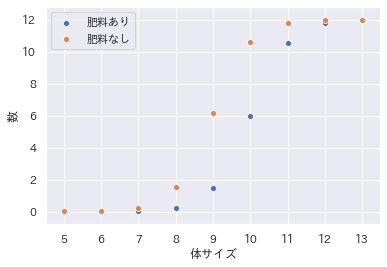

In [6]:
sns.scatterplot(new_x,f_on_list,label=('肥料あり'))
sns.scatterplot(new_x,f_off_list,label=('肥料なし'))
plt.xlabel('体サイズ')
plt.ylabel('数')